## Comparing Inflation Rate in Different Countries

### Getting Necessary Imports

In [18]:
# The Pandas-datareader has an interface to get data from World Bank. Important to import this.
from pandas_datareader import wb

# The world map data is available from GeoPandas.
import geopandas

import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt

### Getting the Inflation Data from World Bank API

In [19]:
# Retrieving the inflation data for all countries through the worldbank API
world_inflation_data = wb.download(indicator='FP.CPI.TOTL.ZG', country='all', start=2012, end=2021)
print(world_inflation_data)

                                  FP.CPI.TOTL.ZG
country                     year                
Africa Eastern and Southern 2020        4.978097
                            2019        3.923372
                            2018        4.720811
                            2017        6.399343
                            2016        6.594604
...                                          ...
Zimbabwe                    2016       -1.543670
                            2015       -2.430968
                            2014       -0.197785
                            2013        1.634950
                            2012        3.725327

[2394 rows x 1 columns]


In [20]:
# Reset index to Column 1 which is the year. Then for convenience we have renamed the columns
world_inflation_data = world_inflation_data.reset_index(1)
world_inflation_data.columns = ['year', 'inflation']
print(world_inflation_data)

                             year  inflation
country                                     
Africa Eastern and Southern  2020   4.978097
Africa Eastern and Southern  2019   3.923372
Africa Eastern and Southern  2018   4.720811
Africa Eastern and Southern  2017   6.399343
Africa Eastern and Southern  2016   6.594604
...                           ...        ...
Zimbabwe                     2016  -1.543670
Zimbabwe                     2015  -2.430968
Zimbabwe                     2014  -0.197785
Zimbabwe                     2013   1.634950
Zimbabwe                     2012   3.725327

[2394 rows x 2 columns]


### Retrieve the world map data

In [21]:
# Using Geopandas to get the worldmap, changing the name of a few countries to match the country name of World Bank and Geopanda map
map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
map = map[map['name'] != 'Antarctica']
map = map.set_index('name')
index_change = {
    'United States of America': 'United States',
    'Yemen': 'Yemen, Rep.',
    'Venezuela': 'Venezuela, RB',
    'Syria': 'Syrian Arab Republic',
    'Solomon Is.': 'Solomon Islands',
    'Russia': 'Russian Federation',
    'Iran': 'Iran, Islamic Rep.',
    'Gambia': 'Gambia, The',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Mauritania': 'Mauritius',
    'Egypt': 'Egypt, Arab Rep.'
}
map = map.rename(index=index_change)

### Merging Inflation Data of World Bank with World Map

In [22]:
# Merging the Inflation Data with the World Map
map = map.join(world_inflation_data, how='outer')

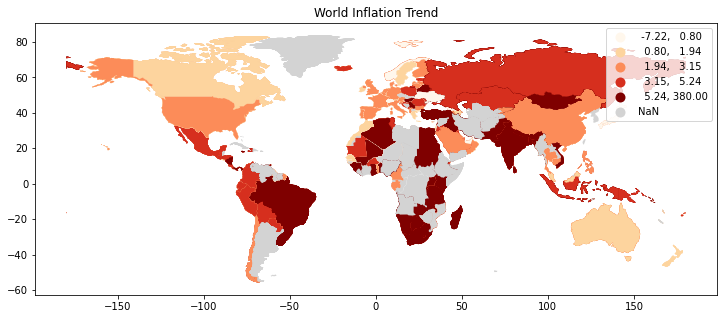

In [23]:
# Ploting the merged inflation and Map data
map.plot('inflation', cmap='OrRd', scheme='quantiles', missing_kwds={"color": "lightgrey"}, legend=True, figsize=(14,5))
plt.title("World Inflation Trend")
plt.show()

### Inflation Trend in USA

In [24]:
usa_inflation_data = wb.download(indicator='FP.CPI.TOTL.ZG', country='USA', start=2012, end=2021)
usa_inflation_data.columns = ['inflation']
print(usa_inflation_data)

                    inflation
country       year           
United States 2020   1.233584
              2019   1.812210
              2018   2.442583
              2017   2.130110
              2016   1.261583
              2015   0.118627
              2014   1.622223
              2013   1.464833
              2012   2.069337


In [25]:
type(usa_inflation_data)

pandas.core.frame.DataFrame

In [26]:
# Manually Adding Inflation in 2021 
usa_inflation_data_2021 = pd.DataFrame({'inflation' : ['6.8']})

usa_inflation_data_update = pd.concat([usa_inflation_data, usa_inflation_data_2021], ignore_index = True,  axis = 0)


In [27]:
# Checking the 2021 data has been added
usa_inflation_data_update

,inflation
0,1.233584
1,1.81221
2,2.442583
3,2.13011
4,1.261583
5,0.118627
6,1.622223
7,1.464833
8,2.069337
9,6.8


In [28]:
# Manually Adding year column
usa_inflation_data_with_year = pd.DataFrame(usa_inflation_data_update)

years = ['2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2021']

usa_inflation_data_with_year['year'] = years
usa_inflation_data_with_year

,inflation,year
0,1.233584,2020
1,1.81221,2019
2,2.442583,2018
3,2.13011,2017
4,1.261583,2016
5,0.118627,2015
6,1.622223,2014
7,1.464833,2013
8,2.069337,2012
9,6.8,2021


In [29]:
# Sorting Inflation basis the year
usa_inflation_data_with_year_index = usa_inflation_data_with_year.set_index('year')
usa_inflation_graph = usa_inflation_data_with_year_index.sort_values(by='year', ascending=True)
usa_inflation_graph 

,inflation
year,
2012,2.069337
2013,1.464833
2014,1.622223
2015,0.118627
2016,1.261583
2017,2.13011
2018,2.442583
2019,1.81221
2020,1.233584


In [30]:
# Converting the inflation data column to float
usa_inflation_graph = pd.DataFrame(usa_inflation_graph)
usa_inflation_graph['inflation'] = usa_inflation_graph['inflation'].astype(float)

In [31]:
# Plotting the Yearly USA Inflation
usa_inflation_graph.hvplot(kind='line', rot=60, figsize=(15,10))

:Curve   [year]   (inflation)